In [22]:
import pandas as pd
import stock_pandas as spd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [23]:
import datetime
import tushare as ts

# 设置tushare pro的token并获取连接
token='b490dcba8a78ab9106ccc6ac1544d7160786cb282c8feb92ae3c6039'
ts.set_token(token)
pro = ts.pro_api()
# 设定获取日线行情的初始日期和终止日期，其中终止日期设定为昨天。
start = datetime.datetime.now() - datetime.timedelta(days=365)  # '20100101'
start_dt = start.strftime('%Y%m%d')
# start_dt = '20100101'
time_temp = datetime.datetime.now() - datetime.timedelta(days=1)
end_dt = time_temp.strftime('%Y%m%d')
dc=pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
print(dc)

#获取各个行业的股票个数
b = pd.DataFrame(dc['industry'].value_counts())
print('各个行业包含的股票-上市公司个数：\n',b)
# 获取指定行业的股票代码
stock_pool_df = dc[dc['industry']=='银行']
print("指定行业的股票列表为：\n",stock_pool_df)
stock_pool_series=stock_pool_df.ts_code

# 获取指定股票代码的日度数据，格式为【股票代码】stock_pool='000001.SZ,000002.SZ'，可以获取单个或者多个股票行情数据；
stock_pool=str(','.join( str(i) for i in stock_pool_series[0:1]))  #获取前5个；也可以自定义  
#     stock_pool='000001.SZ,000002.SZ'
print("要获取的股票代码数据为：\n",stock_pool)
print("获取指定股票的日线行情为：\n")
df = pro.daily(ts_code=stock_pool, start_date=start_dt, end_date=end_dt)
print(df)
print('All Finished!')

        ts_code  symbol  name area industry list_date
0     000001.SZ  000001  平安银行   深圳       银行  19910403
1     000002.SZ  000002   万科A   深圳     全国地产  19910129
2     000004.SZ  000004  国农科技   深圳     生物制药  19910114
3     000005.SZ  000005  世纪星源   深圳     环境保护  19901210
4     000006.SZ  000006  深振业A   深圳     区域地产  19920427
...         ...     ...   ...  ...      ...       ...
3846  688516.SH  688516   奥特维   江苏     专用机械  20200521
3847  688566.SH  688566   吉贝尔   江苏     化学制药  20200518
3848  688588.SH  688588  凌志软件   江苏     软件服务  20200511
3849  688598.SH  688598  金博股份   湖南     矿物制品  20200518
3850  688599.SH  688599  天合光能   江苏     电气设备  20200610

[3851 rows x 6 columns]
各个行业包含的股票-上市公司个数：
       industry
软件服务       204
元器件        184
电气设备       182
化工原料       168
专用机械       149
...        ...
铁路           5
林业           4
机场           4
商品城          3
电器连锁         2

[110 rows x 1 columns]
指定行业的股票列表为：
         ts_code  symbol  name area industry list_date
0     000001.SZ  000001  平安银行   深圳   

In [25]:
df=df.sort_values(by="trade_date")
for data in df.iterrows():
    print(data[1][1],data[1][2])
    

20190614 12.59
20190617 12.48
20190618 12.67
20190619 13.29
20190620 13.17
20190621 13.76
20190624 13.69
20190625 13.72
20190626 13.27
20190627 13.5
20190628 13.73
20190701 14.01
20190702 13.88
20190703 14.18
20190704 14.01
20190705 13.95
20190708 13.82
20190709 13.63
20190710 13.61
20190711 13.68
20190712 13.6
20190715 14.03
20190716 13.97
20190717 13.7
20190718 13.65
20190719 13.74
20190722 13.96
20190723 13.86
20190724 13.87
20190725 13.92
20190726 14.18
20190729 14.25
20190730 14.31
20190731 14.3
20190801 14.06
20190802 13.77
20190805 13.6
20190806 13.1
20190807 13.49
20190808 13.9
20190809 14.55
20190812 14.61
20190813 15.0
20190814 15.14
20190815 14.64
20190816 15.09
20190819 14.91
20190820 14.92
20190821 14.87
20190822 14.4
20190823 14.37
20190826 14.42
20190827 14.36
20190828 14.26
20190829 14.22
20190830 14.29
20190902 14.15
20190903 14.48
20190904 14.32
20190905 14.56
20190906 14.71
20190909 14.98
20190910 14.6
20190911 14.6
20190912 14.66
20190916 14.7
20190917 14.36
2019091



Cash Count : 500000.0 | Time20190614| CurrentStockPrice:12.59| HoldCount39714.05877680699|Account Money539726.648776807|




Cash Count : 727952.402378872 | Time20190617| CurrentStockPrice:12.48| HoldCount21448.641919525573|Account Money995631.4535345512|




Cash Count : 729990.023361227 | Time20190618| CurrentStockPrice:12.67| HoldCount21287.819426837734|Account Money999706.6954992611|




Cash Count : 736589.2473835467 | Time20190619| CurrentStockPrice:13.29| HoldCount20791.263819439715|Account Money1012905.1435439005|




Cash Count : 735341.7715543803 | Time20190620| CurrentStockPrice:13.17| HoldCount20885.984839118253|Account Money1010410.1918855677|




Cash Count : 741503.1370819202 | Time20190621| CurrentStockPrice:13.76| HoldCount20438.211181593553|Account Money1022732.9229406475|




Cash Count : 740787.7996905644 | Time20190624| CurrentStockPrice:13.69| HoldCount20490.46373026819|Account Money1021302.2481579359|




Cash Count : 741095.1566465185 | Time20190625| CurrentSt

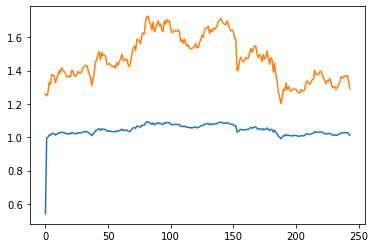

In [36]:


money_count=1000000
cash=1000000
stock_price=0
hold_count=0

# -------------------------------- statistics -------------------------------- #

pricetag=[]
stockprices=[]
for data in df.iterrows():
    time,price=data[1][1],data[1][2]
    stock_price=price
    if hold_count==0:
        hold_count=(cash/2)/stock_price
        cash=cash/2
        money_count=cash+hold_count+stock_price
    else:
        current_stock_price=hold_count*stock_price
        current_all_price=cash+current_stock_price
        if current_all_price < money_count:
            #赔钱 买入
            diff=(money_count-current_all_price)/2
            hold_count+=diff/stock_price
            current_stock_price=hold_count*stock_price
            cash-=diff
            money_count=cash+current_stock_price
        if current_all_price > money_count:
            #挣钱 卖出
            diff=(current_all_price-money_count)/2
            hold_count-=diff/stock_price
            current_stock_price=hold_count*stock_price
            cash+=diff
            money_count=cash+current_stock_price
    pricetag.append(money_count/1000000
    )
    stockprices.append(price/10)

    print("\n\nCash Count : {mm} | Time{Time}| CurrentStockPrice:{price}| HoldCount{holdcount}|Account Money{mn}|\n\n".format(
        mm=cash,
        Time=time,
        price=price,
        holdcount=hold_count,
        mn=money_count
    ))
    

plt.plot(pricetag)
plt.plot(stockprices)
plt.show()


            